Import potrebnih knjižnic za analizo podatkov:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Prebiranje datotek s podakti, tukaj se ignorira vrstice, ki pokvarijo strukturo podatkov oziroma v originalni datoteki niso del podatkov temvec prazna vrstica ipd. 
V programski kodi so seveda zamaknjene za -1.

Izberemo tudi samo stolpce z izbranimi točkami:
A - datumi
B - povprecje
C:IW - izbrane tocke

od IW naprej so pa stolpci prazni in nekje v koncu dokumenta spet nekatere vrednosti, ki niso pomembne

Stolpec z datumi se spremeni v datume.

In [6]:
file_path = 'podatki/Rizana_Zaledje_INCA_dnev_2020_2021_N1.xlsx'
df = pd.read_excel(file_path, sheet_name='Izbrane', skiprows=[0, 1, 3, 4], usecols="A,C:IW")

df["Datum"] = pd.to_datetime(df["Datum"], format="%m/%d/%y")
df = df.set_index('Datum')


In [7]:
print(f"Velikost: {df.shape}")
print(f"Stolpci: {df.columns.tolist()}")

print(df.sample(6))


Velikost: (731, 255)
Stolpci: ['68', '69', '95', '96', '97', '98', '122', '123', '124', '125', '126', '127', '128', '150', '151', '152', '153', '154', '155', '156', '157', '158', '178', '179', '180', '181', '182', '183', '184', '185', '186', '206', '207', '208', '209', '210', '211', '212', '213', '214', '218', '219', '230', '231', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '371', '372', '3

Prikaz vrednosti s stacked bar grafom, večina kode napisana s pomočjo AI orodji. Cilj je razumeti podatke!

Cleaned shape: (731, 255)
Date range: 2020-01-01 00:00:00 to 2021-12-31 00:00:00

Limited to date range: 2020-06-01 00:00:00 to 2020-06-30 00:00:00
Number of days shown: 30

=== Top 20 Columns by Total Value (in selected date range) ===
Rank  Column     Total Value    
-----------------------------------
1     68                     238
2     123                    234
3     95                     223
4     69                     222
5     96                     221
6     98                     219
7     154                    218
8     127                    215
9     122                    215
10    124                    215
11    155                    213
12    125                    212
13    126                    210
14    184                    206
15    207                    203
16    97                     202
17    208                    202
18    178                    200
19    156                    200
20    153                    199


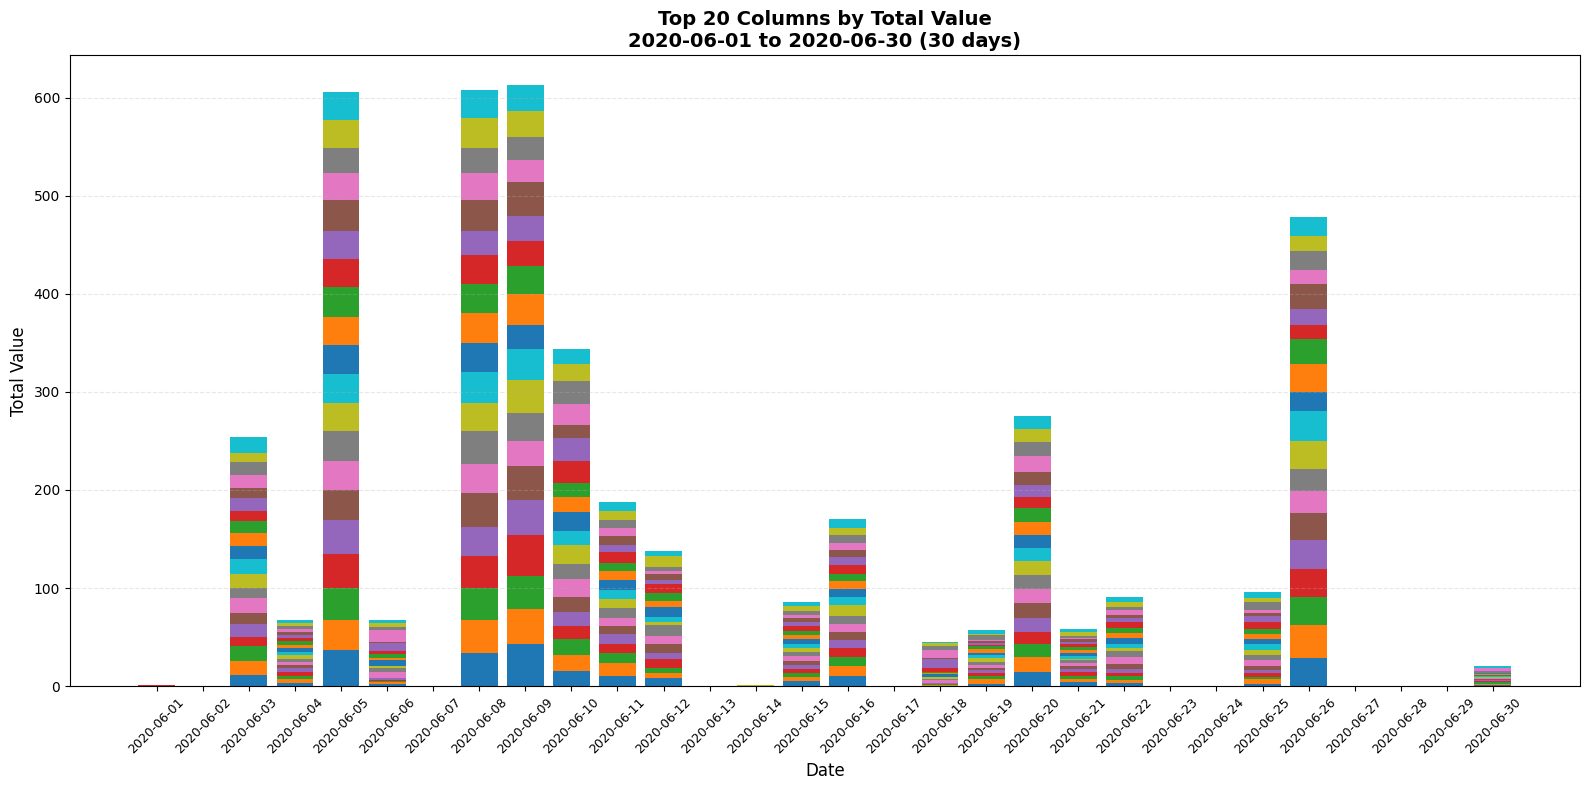


=== Summary Statistics for Top Columns (in selected date range) ===
Column  Total  Average  Max  Min  Days > 0  % Days > 0
    68  237.6      7.9 43.0  0.0        20        66.7
   123  234.2      7.8 35.9  0.0        19        63.3
    95  223.5      7.4 33.6  0.0        20        66.7
    69  221.8      7.4 41.2  0.0        21        70.0
    96  220.7      7.4 36.5  0.0        20        66.7
    98  218.5      7.3 35.0  0.0        21        70.0
   154  217.9      7.3 29.7  0.0        21        70.0
   127  215.1      7.2 32.9  0.0        21        70.0
   122  214.7      7.2 33.5  0.0        19        63.3
   124  214.6      7.2 31.7  0.0        20        66.7
   155  213.3      7.1 30.0  0.0        20        66.7
   125  212.0      7.1 31.4  0.0        20        66.7
   126  209.6      7.0 30.3  0.0        20        66.7
   184  205.9      6.9 29.6  0.0        21        70.0
   207  203.1      6.8 28.2  0.0        20        66.7
    97  201.6      6.7 34.7  0.0        21        7

In [8]:
valid_cols = [col for col in df.columns 
              if not str(col).startswith('Unnamed:') 
              and col != 'Povprecje']
df_numeric = df[valid_cols].astype(float)

print(f"Cleaned shape: {df_numeric.shape}")
print(f"Date range: {df_numeric.index.min()} to {df_numeric.index.max()}")

# 2. LIMIT NUMBER OF ROWS (DATES) - NEW SECTION

# Select specific date range
start_date = '2020-06-01'  # Change to your desired start date
end_date = '2020-06-30'    # Change to your desired end date
date_mask = (df_numeric.index >= start_date) & (df_numeric.index <= end_date)
df_limited = df_numeric[date_mask]

print(f"\nLimited to date range: {df_limited.index.min()} to {df_limited.index.max()}")
print(f"Number of days shown: {len(df_limited)}")

# 3. Calculate total values for each column and select top N
top_n = 20  # Change this to plot more or fewer columns
col_totals = df_limited.sum().sort_values(ascending=False)
top_cols = col_totals.head(top_n).index.tolist()

print(f"\n=== Top {top_n} Columns by Total Value (in selected date range) ===")
print(f"{'Rank':<5} {'Column':<10} {'Total Value':<15}")
print("-" * 35)
for i, (col, total) in enumerate(col_totals.head(top_n).items(), 1):
    print(f"{i:<5} {str(col):<10} {total:>15.0f}")

# 4. Create the stacked bar chart
df_top = df_limited[top_cols]

fig, ax = plt.subplots(figsize=(16, 8))

# Create stacked bars
bottom_vals = np.zeros(len(df_top))

# Plot each column
for column in df_top.columns:
    ax.bar(df_top.index, df_top[column], bottom=bottom_vals, width=0.8)
    bottom_vals += df_top[column].values

# 5. Customize the plot
ax.set_title(f'Top {top_n} Columns by Total Value\n{df_top.index.min().date()} to {df_top.index.max().date()} ({len(df_top)} days)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Value', fontsize=12)

# Format x-axis dates based on number of days shown
num_days = len(df_top)
if num_days <= 30:
    # If <= 30 days, show every day
    ax.set_xticks(df_top.index)
    ax.set_xticklabels(df_top.index.strftime('%Y-%m-%d'), rotation=45, fontsize=9)
elif num_days <= 90:
    # If 31-90 days, show every 3rd day
    ax.set_xticks(df_top.index[::3])
    ax.set_xticklabels(df_top.index[::3].strftime('%Y-%m-%d'), rotation=45, fontsize=9)
else:
    # If > 90 days, show every 7th day (weekly)
    ax.set_xticks(df_top.index[::7])
    ax.set_xticklabels(df_top.index[::7].strftime('%Y-%m-%d'), rotation=45, fontsize=9)

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')

# 8. Adjust layout and show plot
plt.tight_layout()
plt.show()

# 9. Optional: Create a summary table
print("\n=== Summary Statistics for Top Columns (in selected date range) ===")
summary_df = pd.DataFrame({
    'Column': top_cols,
    'Total': [col_totals[col] for col in top_cols],
    'Average': [df_top[col].mean() for col in top_cols],
    'Max': [df_top[col].max() for col in top_cols],
    'Min': [df_top[col].min() for col in top_cols],
    'Days > 0': [(df_top[col] > 0).sum() for col in top_cols],
    '% Days > 0': [((df_top[col] > 0).sum() / len(df_top) * 100) for col in top_cols]
})

print(summary_df.to_string(index=False, float_format='{:,.1f}'.format))